# MSA 2023 Phase 2 - Part 1

In [25]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading in the data

In [26]:
#A representation of the raw dataset
dataset = "exam_scores.csv"
target_variable = ['MathScore', 'ReadingScore', 'WritingScore']
dataframe = pd.read_csv(dataset, index_col=0)
dataframe.head(10) 

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


##  Understanding the Variables

In [27]:
#Examining the variables, whether they are numerical.
variables_all = dataframe.columns
print("The variables of this dataset are: ", list(variables_all))
print()
numerical = []
non_numerical = []
for variable in dataframe:
    if (dataframe[variable].dtypes == "int64" or dataframe[variable].dtypes == "float64"):
        numerical.append(variable)
    else:
        non_numerical.append(variable)

print(f"The Numerical variables are: {numerical}") 
print()
print(f"The Non-numerical variables are: {non_numerical}")
print()
print("The possible target variables are:", target_variable)
print()
print(dataframe.dtypes)

The variables of this dataset are:  ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore']

The Numerical variables are: ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

The Non-numerical variables are: ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

The possible target variables are: ['MathScore', 'ReadingScore', 'WritingScore']

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore

In [28]:
#The following are categorical variables in its raw form, the following code outputs the number of unique groups per category.
print("Number of unique categorical groups:")
for variable in non_numerical:
    print(variable, len(set(dataframe[variable])), set(dataframe[variable]))

Number of unique categorical groups:
Gender 2 {'female', 'male'}
EthnicGroup 6 {nan, 'group A', 'group D', 'group B', 'group E', 'group C'}
ParentEduc 7 {nan, "master's degree", 'high school', 'some high school', "bachelor's degree", 'some college', "associate's degree"}
LunchType 2 {'standard', 'free/reduced'}
TestPrep 3 {nan, 'none', 'completed'}
ParentMaritalStatus 5 {'widowed', nan, 'single', 'married', 'divorced'}
PracticeSport 4 {nan, 'sometimes', 'never', 'regularly'}
IsFirstChild 3 {nan, 'yes', 'no'}
TransportMeans 3 {nan, 'private', 'school_bus'}
WklyStudyHours 4 {'< 5', nan, '> 10', '5 - 10'}


In [29]:
#This code outputs the Analysis, Mean, Range, Standard_Deviation for the numerical variables
dataframe.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


##  Data Preprocessing

In [30]:
#As noticable from the output, there are 10 variables are in string/text format. 
#This will need to be encoded into integer representation.
#It is also noticeable that some features are incomplete because they do not have 30641 entries.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


In [31]:
#Finding out which variables have missing values
print("The following variables have instances which contain null values for the respective variable:")
for variable in dataframe:
    empty_count = dataframe[variable].isnull().sum()
    null_percentage = 100 * (empty_count/dataframe[variable].count())
    non_null_percentage = 100 - null_percentage
    if non_null_percentage != 100:
        print(f"\'{variable}\' has {empty_count} null instances, giving it a " +  "{:.2f} non-null percentage".format(non_null_percentage))
print("All percentages are rounded to 2dp")    

The following variables have instances which contain null values for the respective variable:
'EthnicGroup' has 1840 null instances, giving it a 93.61 non-null percentage
'ParentEduc' has 1845 null instances, giving it a 93.59 non-null percentage
'TestPrep' has 1830 null instances, giving it a 93.65 non-null percentage
'ParentMaritalStatus' has 1190 null instances, giving it a 95.96 non-null percentage
'PracticeSport' has 631 null instances, giving it a 97.90 non-null percentage
'IsFirstChild' has 904 null instances, giving it a 96.96 non-null percentage
'NrSiblings' has 1572 null instances, giving it a 94.59 non-null percentage
'TransportMeans' has 3134 null instances, giving it a 88.61 non-null percentage
'WklyStudyHours' has 955 null instances, giving it a 96.78 non-null percentage
All percentages are rounded to 2dp


In [32]:
#If we were to delete all rows that have at least one missing value, there would only be 19243 values left.
#This is roughly 62.8% of the instances in the raw dataset. 
#Although the dataset is very large, it seems like a poor decision to remove 37.2% of the dataset. 
print("If all incomplete instances were to be removed")
df_test = pd.read_csv(dataset, index_col=0)
df_test = df_test.dropna(axis=0, how='any')
df_test.count()

If all incomplete instances were to be removed


Gender                 19243
EthnicGroup            19243
ParentEduc             19243
LunchType              19243
TestPrep               19243
ParentMaritalStatus    19243
PracticeSport          19243
IsFirstChild           19243
NrSiblings             19243
TransportMeans         19243
WklyStudyHours         19243
MathScore              19243
ReadingScore           19243
WritingScore           19243
dtype: int64

In [33]:
#Filling in the missing values of categorical variables with "unknown" for now.
#It will be beneficial to first see a visualisation of the data distribution before deciding how to impute the missing values.
#If there are too many "unknowns", it may be considerable to remove the variable or impute a mean or median value instead.
#However, such decision may affect the accuracy of models, meaning that this decision needs to be made with precaution.
for variable in dataframe:
    if variable in non_numerical:
        dataframe[variable].fillna('unknown', inplace=True)
    elif variable in numerical:
        dataframe[variable].fillna(0, inplace=True)
heatmap_dataframe = dataframe.copy() #This heatmap_dataframe is a copy that will be used later in correlation representation.

## 3. Visualise data

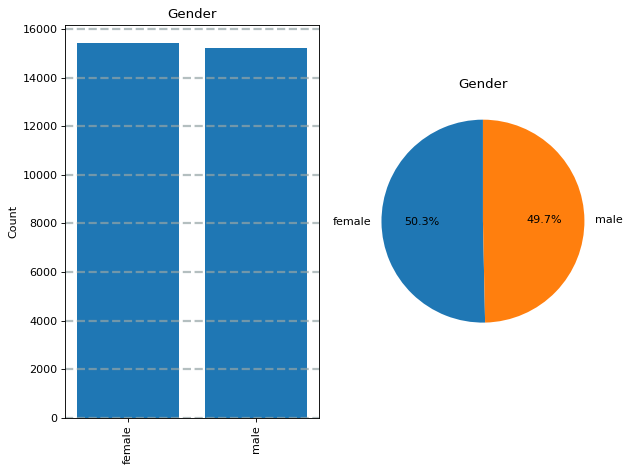

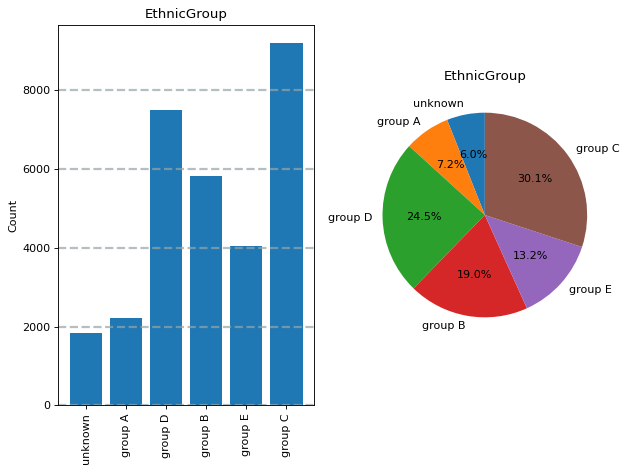

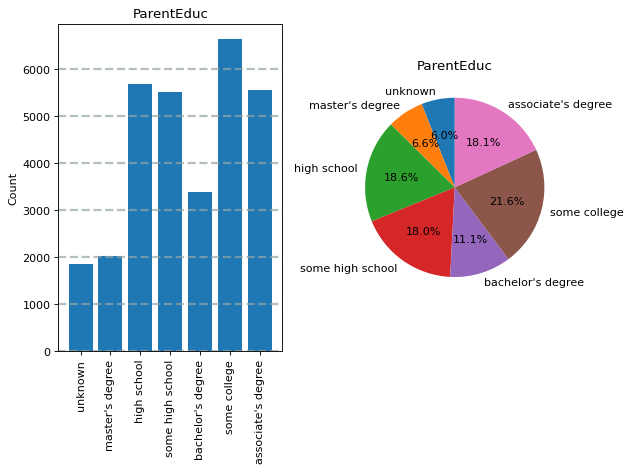

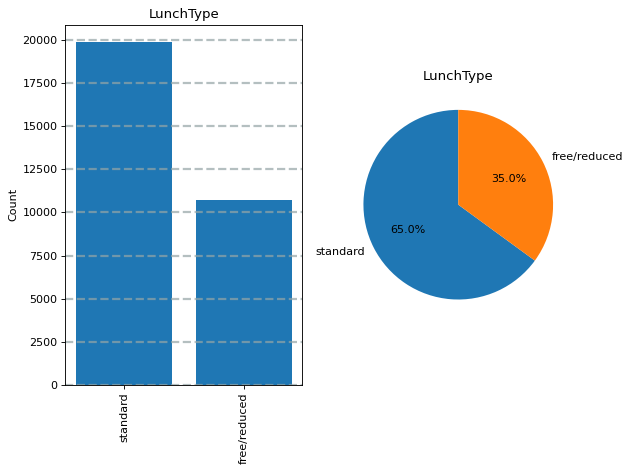

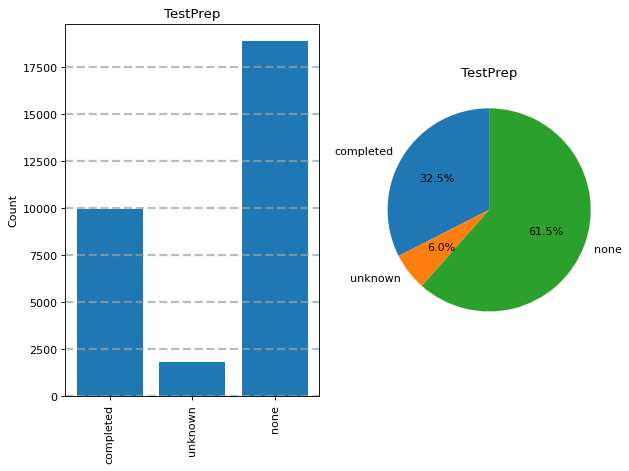

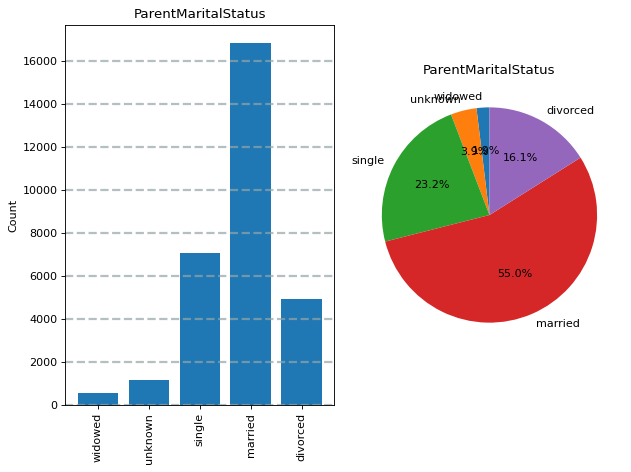

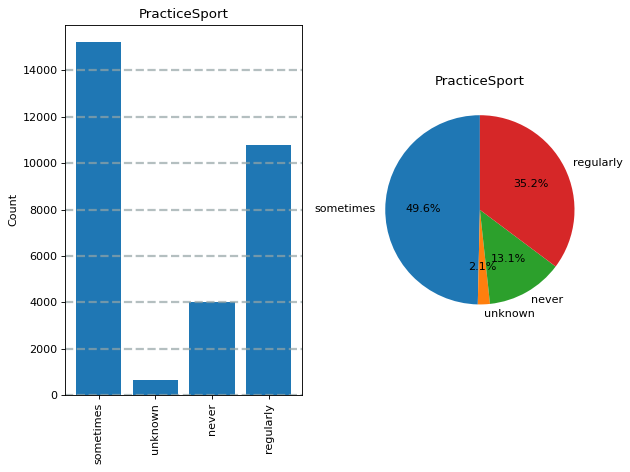

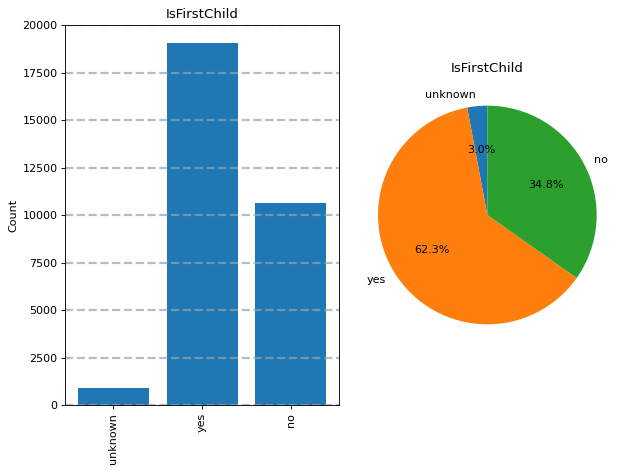

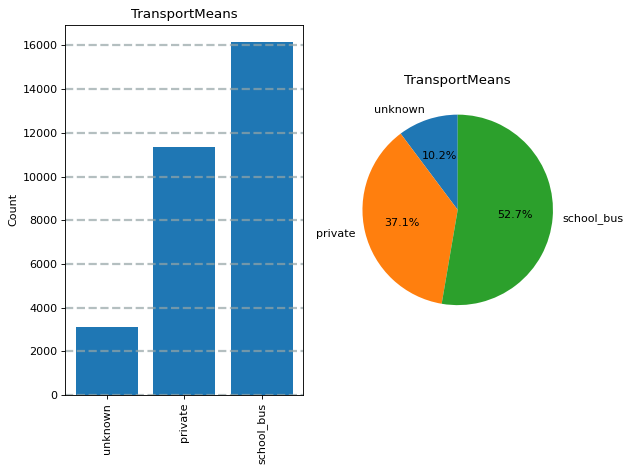

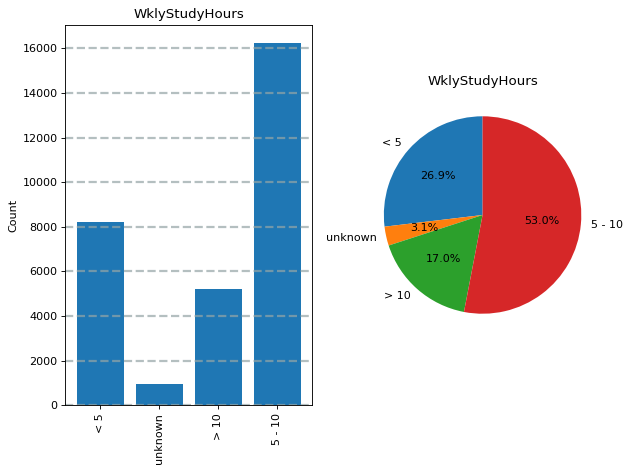

In [34]:
#The following code represents the non_numerical variables from raw dataset in the form of bar graphs and pie graphs.
for variable in non_numerical:
    x = np.array(list(set(dataframe[variable])))
    y = np.array([])
    for value in x:
        y = np.append(y,dataframe[variable].value_counts()[value])
        
    figure = plt.figure(figsize=(8, 6), dpi=80)
    plt.subplot(1, 2, 1)
    plt.bar(x, height = y) 
    # Customize the chart
    plt.title(variable)
    plt.ylabel('Count')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.xticks(rotation=90)    
    
    plt.subplot(1, 2, 2)
    plt.title(variable)
    plt.pie(y, labels = x, startangle = 90,autopct='%1.1f%%')
    plt.tight_layout()
     

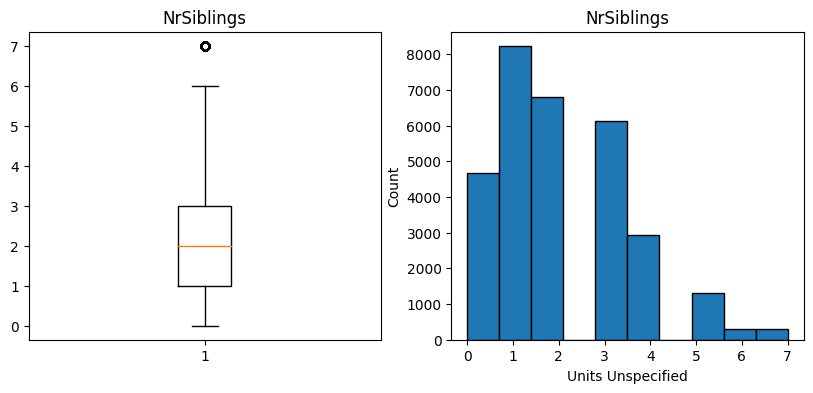

<Figure size 640x480 with 0 Axes>

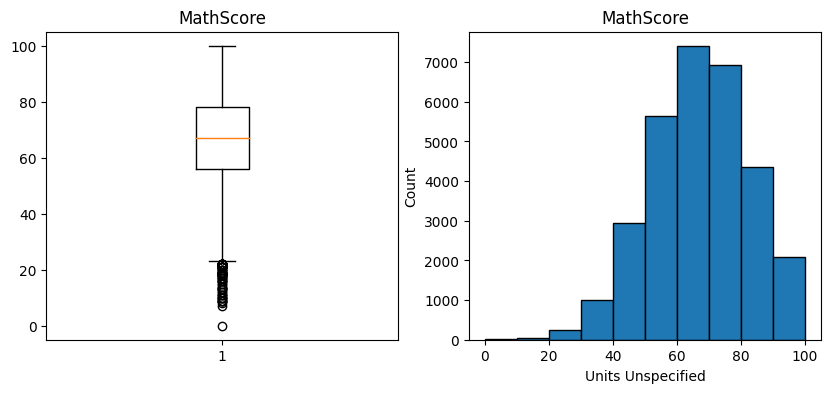

<Figure size 640x480 with 0 Axes>

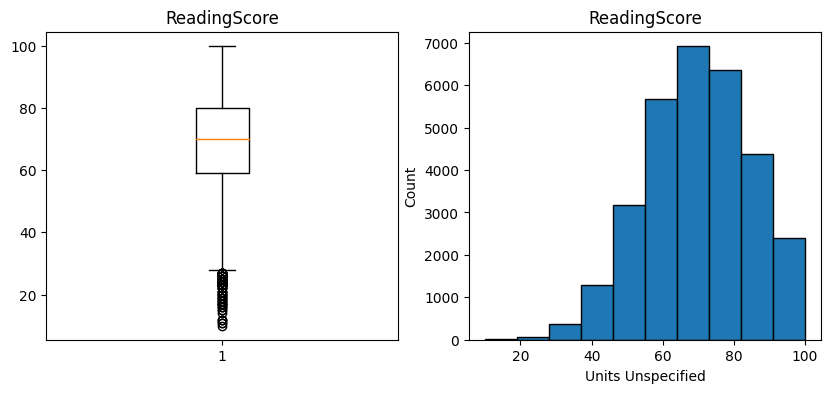

<Figure size 640x480 with 0 Axes>

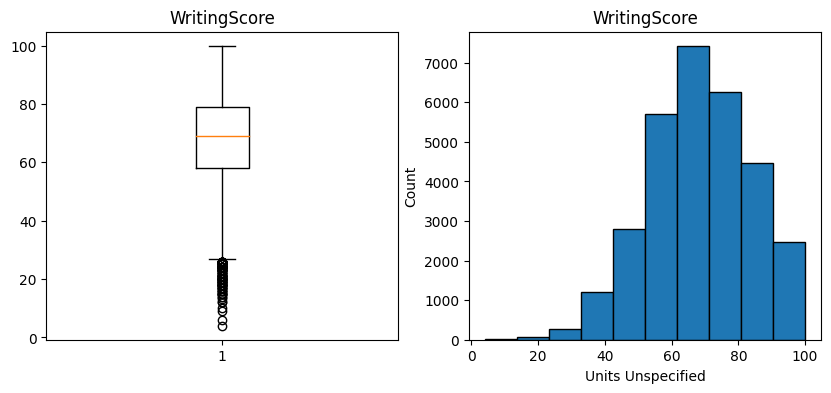

<Figure size 640x480 with 0 Axes>

In [35]:
#The following code represents the numerical variables from raw dataset in the form of a box and whiskers plot and histogram
for variable in numerical:
    var = dataframe[variable]
    fig = plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.boxplot(var)
    plt.title(variable)
    
    plt.subplot(1, 2, 2)
    plt.hist(var, ec="k")
    plt.xlabel('Units Unspecified')
    plt.ylabel('Count')
    plt.title(variable)
    plt.show()
    plt.tight_layout()

In [36]:
#The following code uses OneHotEncoding to encode non_numerical categorical variables into integer represntation.
#If a feature had the following unique values : ["A","B","C"], OneHotEncoding will convert this into three binary groups
# "A" = [0,1], "B" = [0,1], "C" = [0,1] 
#This is necessary for correlation fidning and model training.
d3 = dataframe.copy() #Backup incase some features need to be dropped
from sklearn import preprocessing
for value in non_numerical:
    encoder = sklearn.preprocessing.OneHotEncoder(sparse =False)
    encoded_data = pd.DataFrame(encoder.fit_transform(dataframe[[value]]))
    encoded_data.columns = encoder.get_feature_names_out([value])
    dataframe = dataframe.join(encoded_data)
    dataframe.drop(value,axis=1,inplace= True)

c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remo

## Identifying correlated variables

In [37]:
#Checking that encoding and filling in empty values was conducted successfully.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NrSiblings                     30641 non-null  float64
 1   MathScore                      30641 non-null  int64  
 2   ReadingScore                   30641 non-null  int64  
 3   WritingScore                   30641 non-null  int64  
 4   Gender_female                  30641 non-null  float64
 5   Gender_male                    30641 non-null  float64
 6   EthnicGroup_group A            30641 non-null  float64
 7   EthnicGroup_group B            30641 non-null  float64
 8   EthnicGroup_group C            30641 non-null  float64
 9   EthnicGroup_group D            30641 non-null  float64
 10  EthnicGroup_group E            30641 non-null  float64
 11  EthnicGroup_unknown            30641 non-null  float64
 12  ParentEduc_associate's degree  30641 non-null  float6

<Axes: >

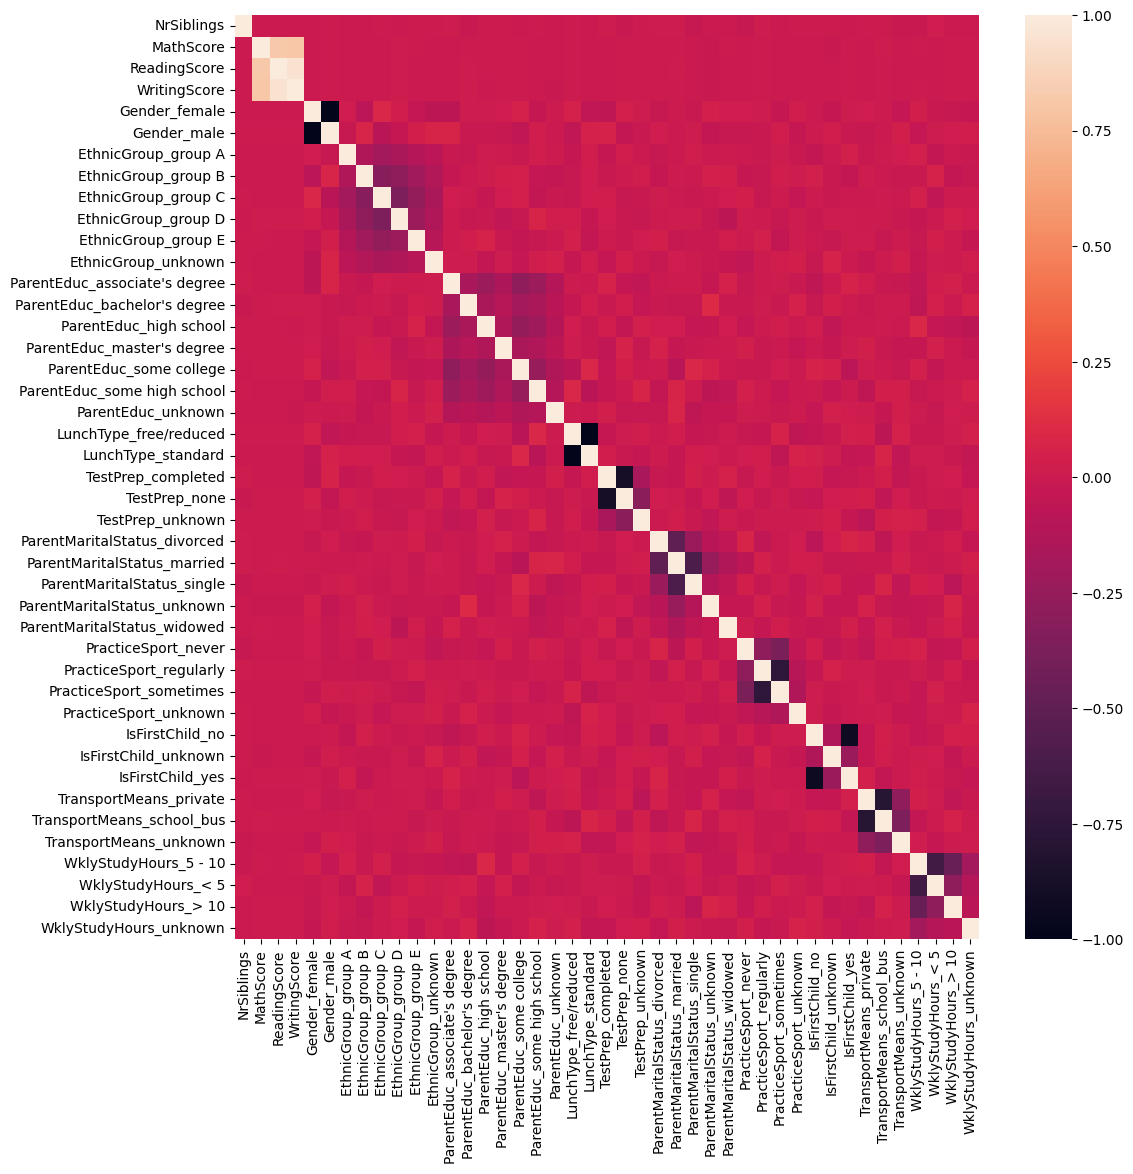

In [38]:
#Created a heatmap to show correlation between variables
#This was done with the dataframe with integer representation of the 
#As noticeable, the three possible target variables share a strong correlation with each other.
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(dataframe.corr())

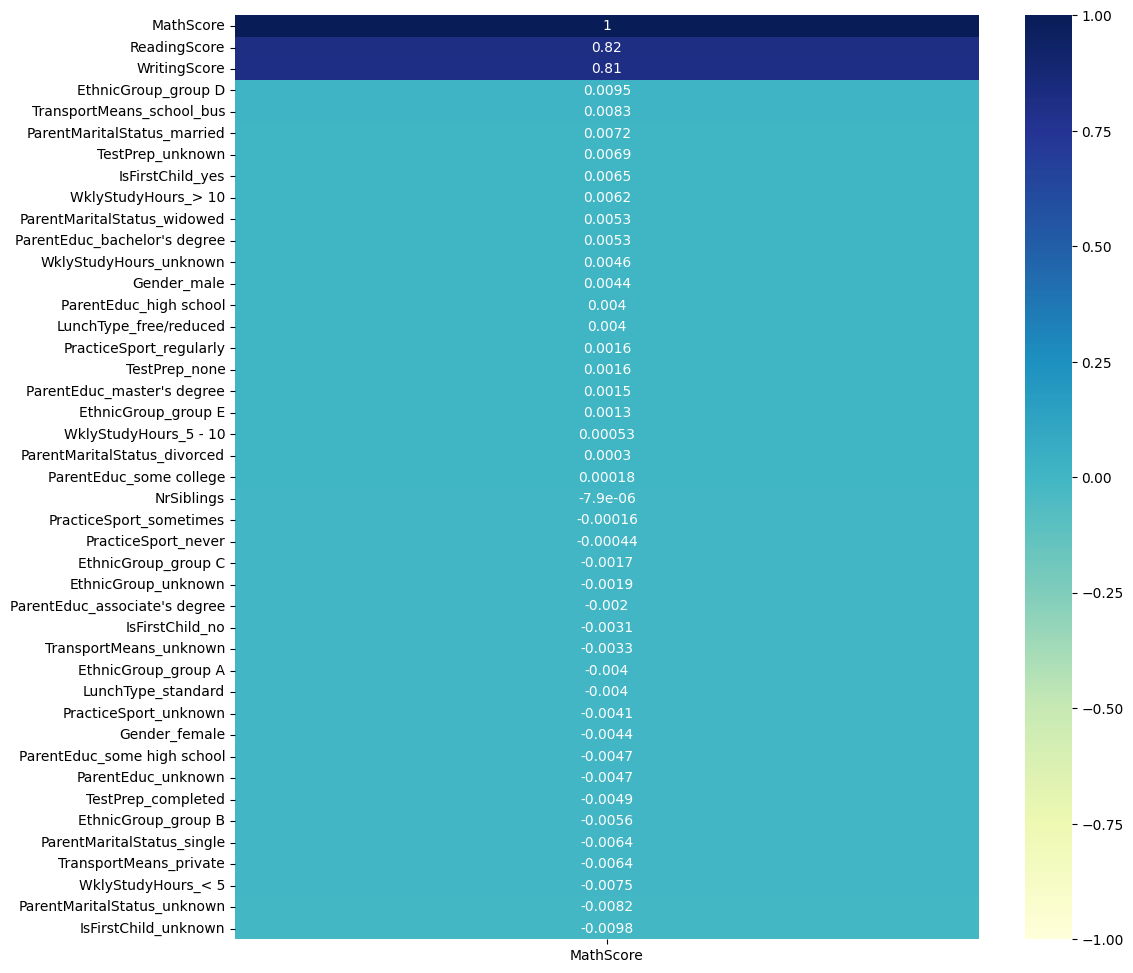

In [39]:
#At this point, I chose MathScore as my target variable because it was one of my favourite subjects at highschool
#The following heatmap compares correlation with the MathScore target variable.
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(dataframe.corr()[['MathScore']].sort_values('MathScore').tail(len(dataframe.columns)),vmax=1,vmin=-1,cmap='YlGnBu',annot=True, ax=ax)
ax.invert_yaxis()

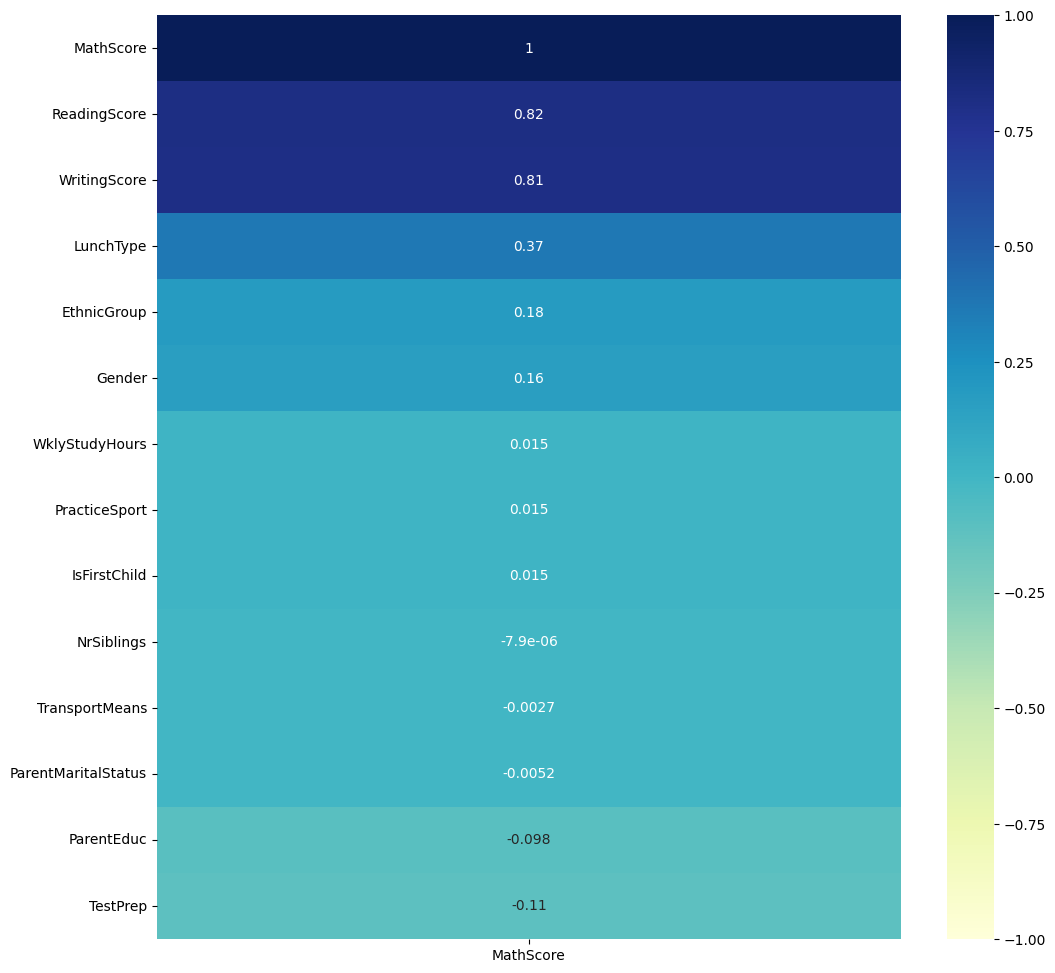

In [40]:
#The following heatmap compares correlation with the MathScore target variable and the variables from the original raw dataset.
for value in non_numerical:
    heatmap_dataframe[value] = heatmap_dataframe[value].astype('category')
    heatmap_dataframe[value] = heatmap_dataframe[value].cat.codes
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(heatmap_dataframe.corr()[['MathScore']].sort_values('MathScore').tail(len(heatmap_dataframe.columns)),vmax=1,vmin=-1,cmap='YlGnBu',annot=True, ax=ax)
ax.invert_yaxis()

In [41]:
heatmap_dataframe.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,5,1,1,1,1,1,2,3.0,1,1,71,71,74
1,0,2,4,1,2,1,2,2,0.0,2,0,69,90,88
2,0,1,3,1,1,2,2,2,4.0,1,1,87,93,91
3,1,0,0,0,1,1,0,0,1.0,2,0,45,56,42
4,1,2,4,1,1,1,2,2,0.0,1,0,76,78,75


<Axes: >

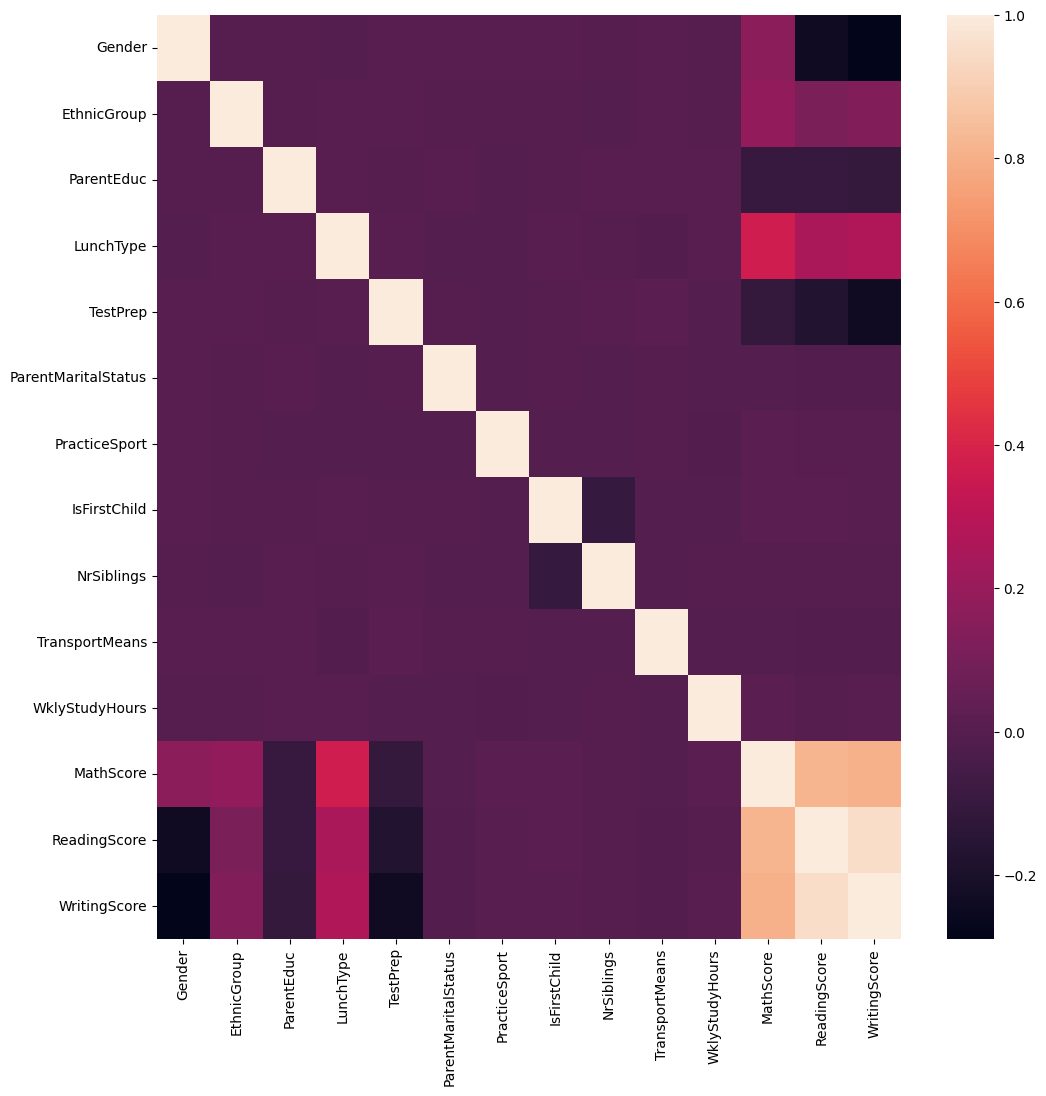

In [42]:
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(heatmap_dataframe.corr())

In [43]:
#This line converts the preprocssed dataframe into a csv file.
dataframe.to_csv("preprocessed_exam_scores.csv")

## 5. Further Changes

In [44]:
#Upon review of this 
df2 = heatmap_dataframe.corr()[['MathScore']]
df2 = df2.transpose()
remove =[x for x in df2.columns if df2[x][0] < 0.1]
for value in remove:
    d3.drop([value], axis =1, inplace=True)
print(d3.columns)
for value in non_numerical:
    if value in d3.columns:
        encoder = sklearn.preprocessing.OneHotEncoder(sparse =False)
        encoded_data = pd.DataFrame(encoder.fit_transform(d3[[value]]))
        encoded_data.columns = encoder.get_feature_names_out([value])
        d3 = d3.join(encoded_data)
        d3.drop(value,axis=1,inplace= True)    

d3.info
d3.to_csv("changed_exam_scores.csv")   
print("Final dataframe successfully created")

Index(['Gender', 'EthnicGroup', 'LunchType', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')


c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Final dataframe successfully created


In [47]:
d3.info

<bound method DataFrame.info of      MathScore  ReadingScore  WritingScore  Gender_female  Gender_male  \
0           71            71            74            1.0          0.0   
0           72            86            82            1.0          0.0   
0           74            77            68            1.0          0.0   
0           62            52            53            1.0          0.0   
0           79            89            82            1.0          0.0   
..         ...           ...           ...            ...          ...   
999         66            63            57            0.0          1.0   
999         74            73            71            0.0          1.0   
999         38            57            59            0.0          1.0   
999         53            69            67            0.0          1.0   
999         78            78            80            0.0          1.0   

     EthnicGroup_group A  EthnicGroup_group B  EthnicGroup_group C  \
0        

Please look at my pdf file